In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from statistics import mean
from astropy import units as u
from astropy.table import Table, Column
from astropy.table import QTable
from astroquery.simbad import Simbad
from astropy.coordinates import Galactocentric
from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
import gala.coordinates as gc
import pandas as pd

#Finding the row of the catalogue that corresponds to a certain HD #
def HDtoRow(HDnum):          
    x = np.where(hd == HDnum)
    row = int(x[0])
    return row

#Finding the distance, proper motion in RA and Dec, radial velocity, and position in RA and Dec from the star's HD #
def HDtoInfo(HDnum):                           
    distance = dist[HDtoRow(HDnum)]            
    properRA = propRA[HDtoRow(HDnum)]
    properDec = propDec[HDtoRow(HDnum)]
    radialVel = radVel[HDtoRow(HDnum)]
    RA = RA_rad[HDtoRow(HDnum)]
    Dec = Dec_rad[HDtoRow(HDnum)]
    info = [distance, properRA, properDec, radialVel, RA, Dec]
    return info

#Finding the absolute magnitude of a star from its HD
def HDtoAbsMag(HDnum):
    abs_mag = absmag[HDtoRow(HDnum)]
    return abs_mag

#Finding the B-V color index from a star's HD
def HDtoBV(HDnum):
    bv = color_index[HDtoRow(HDnum)]
    return bv

#Finding the space velocity of a star. The argument infoArray is the array of information given by the HDtoInfo function
def dataTospaceVel(infoArray):
    distance = infoArray[0]
    properMotion_RA = infoArray[1]
    properMotion_Dec = infoArray[2]
    radVel = infoArray[3]
    RA = infoArray[4]
    Dec = infoArray[5]
    # Original units of proper motion in miliseconds of arc / year. Need to change this to seconds of arc / year
    propMotionRA = properMotion_RA / 1000
    propMotionDec = properMotion_Dec / 1000
    # Convert proper motions to transverse velocities in km/s
    velTrans_RA = propMotionRA * distance * 4.740
    velTrans_Dec = propMotionDec * distance * 4.740
    # Converting velocities to new coordinate system to get dx, dy, dz in km/s
    dx = (radVel * np.cos(Dec) * np.cos(RA)) - (velTrans_RA * np.sin(RA)) - (velTrans_Dec * np.sin(Dec) * np.cos(RA))
    dy = (radVel * np.cos(Dec) * np.sin(RA)) + (velTrans_RA * np.cos(RA)) - (velTrans_Dec * np.sin(Dec) * np.sin(RA))
    dz = (radVel * np.sin(Dec)) + (velTrans_Dec * np.cos(Dec))
    # Converting velocities from km/s to parsec/year
    #dx = dx * (3.24 * 10**(-14)) * 60 * 60 * 24 * 365.25
    #dy = dy * (3.24 * 10**(-14)) * 60 * 60 * 24 * 365.25
    #dz = dz * (3.24 * 10**(-14)) * 60 * 60 * 24 * 365.25
    spaceVel = [dx, dy, dz]
    return spaceVel

#Finding a star's cartesian coordinates from its RA and Dec
def radec_to_cartesian(ra_list, dec_list, vel_mag):
    #Read in individual componenets of RA and Dec
    ra_hour = ra_list[0]
    ra_min = ra_list[1]
    ra_sec = ra_list[2]
    dec_deg = dec_list[0]
    dec_arcmin = dec_list[1]
    dec_arcsec = dec_list[2]
    #Convert to degrees
    ra_deg = ra_hour * 15
    ra_arcmin = ra_min * 15
    ra_arcsec = ra_sec * 15
    ra_totdeg = ra_deg + (ra_arcmin/60) + (ra_arcsec/3600)
    dec_totdeg = dec_deg + (dec_arcmin/60) + (dec_arcsec/3600)
    #Convert to radians
    ra_rad = ra_totdeg * (np.pi/180)
    dec_rad = dec_totdeg * (np.pi/180)
    #Find cartesian velocities
    vx = vel_mag * np.cos(dec_rad) * np.cos(ra_rad)
    vy = vel_mag * np.cos(dec_rad) * np.sin(ra_rad)
    vz = vel_mag * np.sin(dec_rad)
    vel_vector = [vx, vy, vz]
    return vel_vector


Star 1: Lambda Ursa Majoris
[-2.3475979602671844, 38.864464643846226, 6.0158794441732875] 

Star 2: R Lyrae
[-2.2261871036624736, 45.17286102812994, 5.711955084322469] 

Star 3: 95 Aquarii
[-7.246084337302554, 18.103551842470473, -1.253726878627938] 

Star 4: 47 Arietis
[-5.9516613501603635, 45.91834674064229, 5.228910029405311] 

Star 5: Kappa Reticuli
[-6.9698543814287, 55.40789219849239, 6.760093054609534] 

Star 6: 20 Psc
[-4.526303458449437, 44.68559218038144, 2.8653912567313133] 



<IPython.core.display.Javascript object>


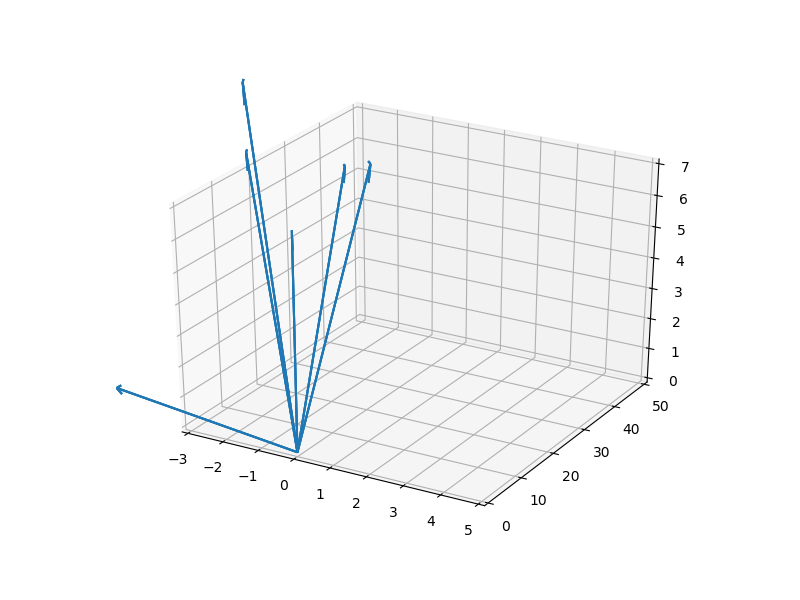

In [2]:
%matplotlib notebook

#Open catalogue data
starInfo = open("hygdata_v3.csv")

#Read in HD number, distance, proper motions, radial velocity, right ascension and declination (in radians)
dist, propRA, propDec, radVel, RA_rad, Dec_rad, xCat, yCat, zCat, vxCat, vyCat, vzCat, absmag = np.loadtxt("hygdata_v3.csv", usecols=(9, 10, 11, 12, 23, 24, 17, 18, 19, 20, 21, 22, 14), delimiter=",", skiprows = 2, unpack=True)
hd, color_index = np.genfromtxt("hygdata_v3.csv", usecols=(2, 16), delimiter=",", skip_header = 2, unpack = True)

# Testing stars in Hyades
print("Star 1: Lambda Ursa Majoris")
print(dataTospaceVel(HDtoInfo(89021)), "\n")
print("Star 2: R Lyrae")
print(dataTospaceVel(HDtoInfo(175865)), "\n")
print("Star 3: 95 Aquarii")
print(dataTospaceVel(HDtoInfo(219832)), "\n")
print("Star 4: 47 Arietis")
print(dataTospaceVel(HDtoInfo(18404)), "\n")
print("Star 5: Kappa Reticuli")
print(dataTospaceVel(HDtoInfo(22001)), "\n")
print("Star 6: 20 Psc")
print(dataTospaceVel(HDtoInfo(223252)), "\n")

test1 = dataTospaceVel(HDtoInfo(89021))
test2 = dataTospaceVel(HDtoInfo(175865))
test3 = dataTospaceVel(HDtoInfo(219832))
test4 = dataTospaceVel(HDtoInfo(18404))
test5 = dataTospaceVel(HDtoInfo(22001))
test6 = dataTospaceVel(HDtoInfo(223252))

origin = [0, 0, 0]
starList = [test1, test2, test3, test4, test5, test6]

fig1 = plt.figure(figsize=(8,6))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.set_xlim([-3, 5])
ax1.set_ylim([0, 50])
ax1.set_zlim([0, 7])

for i in range(len(starList)):
    X, Y, Z = zip(origin, origin, origin)
    U, V, W = zip(starList[i], starList[i], starList[i])
    ax1.quiver(X,Y,Z,U,V,W,arrow_length_ratio=0.03)

plt.show()

In [3]:
#Reading in Gaia info
arc_gaia = pd.read_csv('Arcturus Gaia Info.csv')
arc_gaia_tab = Table.from_pandas(arc_gaia)  #Make table from pandas df
arc_gaia_qtab = QTable(arc_gaia_tab, units=
                      {'ra': u.degree, 'dec': u.degree, 'parallax': u.marcsec, 'target_radial_velocity': u.km/u.s,
                      'target_pm_ra': u.marcsec/u.yr, 'target_pm_dec': u.marcsec/u.yr})   #Make QTable and give units for columns
plx_to_dist = Column(name='dist', data=arc_gaia_qtab['parallax'].to(u.parsec, equivalencies=u.parallax()))   #Making a new distance (pc) column from parallax data
arc_gaia_qtab.add_column(plx_to_dist, index=5)

#Non-Gaia info for velocities
arc = pd.read_csv('Arcturus Stars.csv')
arc_hd = arc[['hd']]

hyg_db = pd.read_csv('hygdata_v3.csv')
hyg_db = hyg_db[hyg_db['hd'].notna()]  #Drop stars that don't have HD numbers recorded

arc_info = hyg_db.loc[hyg_db['hd'].isin(arc_hd['hd'])]  #Get info for Hyades stars
arc_tab = Table.from_pandas(arc_info)
arc_tab.keep_columns(['hd', 'ra', 'dec', 'dist', 'pmra', 'pmdec', 'mag', 'absmag', 'ci', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'lum'])
arc_qtab = QTable(arc_tab, units={'vx': u.pc/u.yr, 'vy': u.pc/u.yr, 'vz': u.pc/u.yr, 'ra': u.degree, 'dec': u.degree})
arc_qtab['vx'] = arc_qtab['vx'].to(u.km/u.s)   #Converting velocities from pc/yr to km/s
arc_qtab['vy'] = arc_qtab['vy'].to(u.km/u.s)
arc_qtab['vz'] = arc_qtab['vz'].to(u.km/u.s)

#Getting absolute magnitudes and B-V values
arc_stars = open("Arcturus Stars.csv")
arc_starHD = np.genfromtxt("Arcturus Stars.csv", usecols=0, delimiter=",", skip_header=1, unpack=True)

arc_absmag = []
arc_bv = []

for i in range(0, len(arc_starHD)):
    starHD1 = arc_starHD[i]
    starAbsMag = HDtoAbsMag(starHD1)
    arc_absmag.append(starAbsMag)
    starBV = HDtoBV(starHD1)
    arc_bv.append(starBV)

print(min(arc_qtab['vy']))
print(arc_gaia_qtab)

-64.48539701984805 km / s
 source_id          ra         ... target_radial_velocity    target_distance    
                   deg         ...         km / s                               
----------- ------------------ ... ---------------------- ----------------------
2.85846e+18        9.010795899 ...                 -60.94               1.73e-05
4.70861e+18 11.165312599999998 ...      95.18700000000001               3.25e-07
3.12322e+17        12.47119502 ...                -159.71               3.02e-08
4.12052e+17        16.75149631 ...                -96.757               6.16e-08
2.53832e+18        16.99924593 ...                -94.535               3.78e-08
5.12197e+18 30.176618599999998 ...                 -73.02               1.55e-07
  2.824e+16        42.99331451 ...                  6.119 3.2799999999999996e-08
5.67794e+16        53.82656871 ...                 -11.93               5.51e-08
3.26982e+18        57.39958816 ...                 -12.57               3.38e-08
4.

<IPython.core.display.Javascript object>


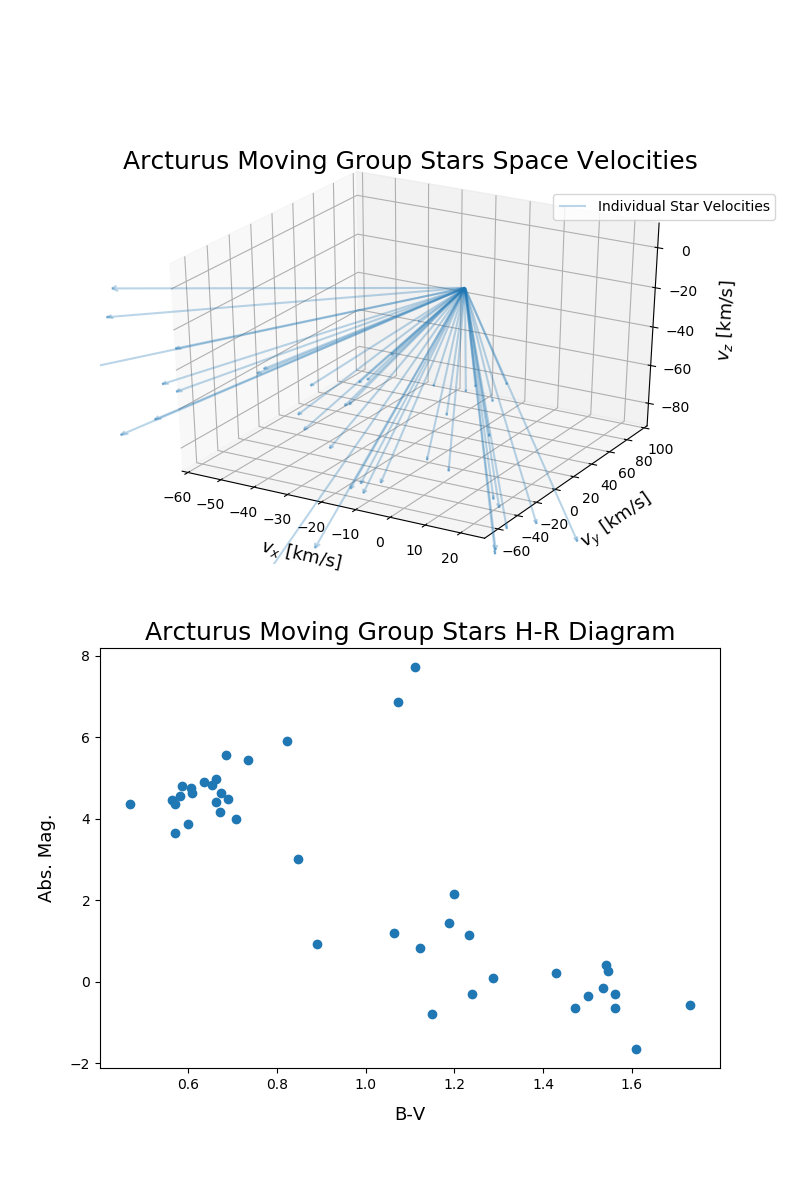

In [4]:
#Getting velocity vector for Hyades cluster
#hyadescluster_vector = radec_to_cartesian([6, 18, 5], [7, 29, 0], tot_velmag)

#Set up a figure to graph the velocity vectors
fig2 = plt.figure(figsize=(8,12))
ax2 = fig2.add_subplot(211, projection='3d')
ax2.set_xlim([-60, 25])
ax2.set_ylim([-70, 100])
ax2.set_zlim([-90, 10])
ax2.set_title("Arcturus Moving Group Stars Space Velocities", fontsize = 18)
ax2.set_xlabel("$v_x$ [km/s]", fontsize = 13, labelpad = 10)
ax2.set_ylabel("$v_y$ [km/s]", fontsize = 13, labelpad = 10)
ax2.set_zlabel("$v_z$ [km/s]", fontsize = 13, labelpad = 10)

#Hyades group stars vectors
#ax2.quiver(X, Y, Z, U, V, W, arrow_length_ratio=0.02, label="Moving Group Star Velocities")
ax2.quiver(*origin, arc_qtab['vx'], arc_qtab['vy'], arc_qtab['vz'], arrow_length_ratio=0.02, label="Individual Star Velocities", alpha = 0.3)
#Avg. Hyades Group vector
#avgX = mean(U_h)
#avgY = mean(V_h)
#avgZ = mean(W_h)
#ax2.quiver(*origin, avgX, avgY, avgZ, arrow_length_ratio=0.03, label="Avg. Moving Group Velocity", linewidth=3)
#Verified motion of Hyades cluster vector
#ax2.quiver(*origin, hyadescluster_vector[0], hyadescluster_vector[1], hyadescluster_vector[2], color='red', arrow_length_ratio=0.07, label="Hyades Cluster Motion")
    
#ax2.quiverkey(baseArrow,.85,.85,0.8,label="Moving Group Stars")
ax2.legend(loc='center right', bbox_to_anchor=(1.1, 0.85))

ax3 = fig2.add_subplot(212)
#ax3.set_ylim([4, -1])
ax3.set_title("Arcturus Moving Group Stars H-R Diagram", fontsize = 18)
ax3.set_ylabel("Abs. Mag.", fontsize = 13, labelpad = 10)
ax3.set_xlabel("B-V", fontsize = 13, labelpad = 10)
ax3.scatter(arc_bv, arc_absmag)
plt.show()

In [5]:
c = SkyCoord(ra=arc_gaia_qtab['ra'], dec=arc_gaia_qtab['dec'], radial_velocity=arc_gaia_qtab['target_radial_velocity'], 
            distance=arc_gaia_qtab['dist'], pm_ra_cosdec=arc_gaia_qtab['target_pm_ra'], pm_dec=arc_gaia_qtab['target_pm_dec'],
            frame='icrs')
pm = [arc_gaia_qtab['target_pm_ra'], arc_gaia_qtab['target_pm_dec']]
c = c.transform_to(coord.Galactocentric)  #Transform from spherical coordinates (RA, Dec, PM) to galactocentric

<IPython.core.display.Javascript object>


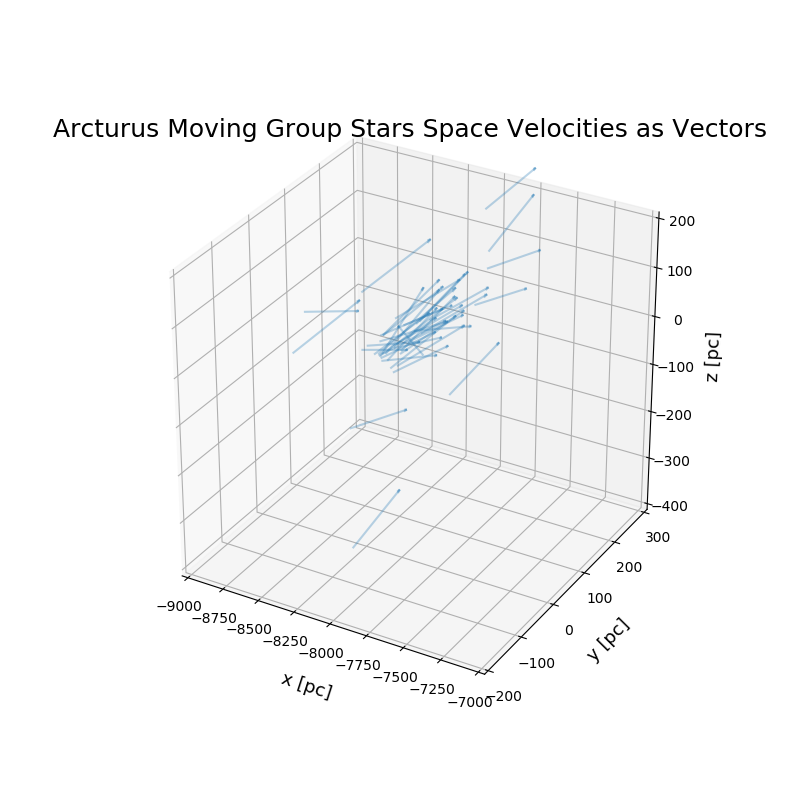

In [6]:
#Set up a figure to graph the velocity vectors
fig2 = plt.figure(figsize=(8,8))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.set_xlim([-9000, -7000])
ax2.set_ylim([-200, 300])
ax2.set_zlim([-400, 200])
ax2.set_title("Arcturus Moving Group Stars Space Velocities as Vectors", fontsize = 18)
ax2.set_xlabel("x [pc]", fontsize = 13, labelpad = 10)
ax2.set_ylabel("y [pc]", fontsize = 13, labelpad = 10)
ax2.set_zlabel("z [pc]", fontsize = 13, labelpad = 10)

#Arcturus group stars vectors
ax2.quiver(c.x, c.y, c.z, c.v_x, c.v_y, c.v_z, arrow_length_ratio=0.05, label="Individual Star Velocities", alpha = 0.3);

<IPython.core.display.Javascript object>


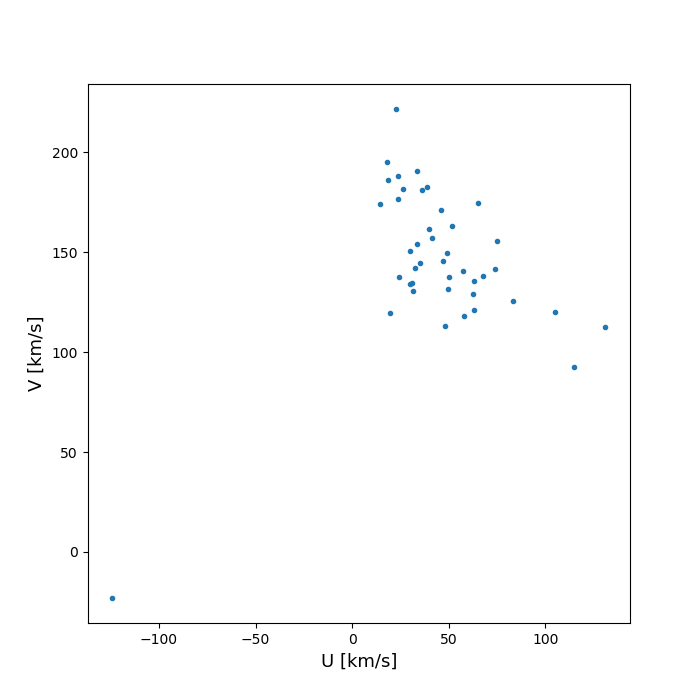

In [7]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

ax.scatter(c.v_x, c.v_y, marker='.')
#ax.set_xlim([0, 100])
#ax.set_ylim([140, 250])
ax.set_xlabel("U [km/s]", fontsize=13)
ax.set_ylabel("V [km/s]", fontsize=13);